# IGRAC's Method

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings; warnings.filterwarnings(action='ignore')

In [2]:
# INITIALIZE THE OUTPUT FILE
list_aquifers = []

In [3]:
#Groundwater level time series are in the file WATERLEVEL_demo, read into gdf dataframe
filename = "Data Subset.csv"
#gdf = pd.DataFrame(pd.read_csv(filename, index_col='date', parse_dates=True, infer_datetime_format=True)) #replace demo file with filename
gdf = pd.DataFrame(pd.read_csv(filename)) #without automatic parsing of dates
gdf['date'] = pd.to_datetime(gdf['date'], format='%Y-%m-%d')
gdf.set_index('date', inplace=True)
#gdf['level']=-gdf['level']*0.3048 # converting depth to elevation and feet to meters
gdf.head()

,site,level
date,,
1993-01-14,#2752301,-24.6
1993-11-02,#2752301,-24.2
1999-12-17,#2752301,-24.4
2003-01-13,#2752301,-25.0
2013-02-28,#2752301,-25.0


There are some cases where borehole names are numbers (as is the case for most boreholes in the US). When they are read into the notebook, they usually have a scientific format. If this happens, sometimes the value is modified. To avoid that, append a   #  symbol in front of each site name in the .csv file.

Now we create a matrix table with one time series per column. We resample this new dataframe to a monthly timescale and create a list of the column names.

In [4]:
#gdf_pivot is new matrix table/dataframe
gdf_pivot = gdf.pivot_table(index='date',columns='site',values='level')
print(gdf_pivot)
rng = pd.period_range('2013-01-01',periods=120, freq='M').to_timestamp() - pd.DateOffset(day=31)
#gdf_pivot = gdf_pivot.resample('M').mean()
gdf_pivot = gdf_pivot.resample('M').mean().reindex(index=rng)
gdf_pivot.index.name = "date"
gdf_pivot

site        #1001401  #1002  #1002301  #1002802  #1002901  #1003201  #1003501  \
date                                                                            
1993-01-01       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1993-01-02       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1993-01-03       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1993-01-04       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1993-01-05       NaN    NaN     -92.3       NaN       NaN     -92.7     -78.9   
...              ...    ...       ...       ...       ...       ...       ...   
2022-12-26       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
2022-12-27       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
2022-12-28       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
2022-12-29       NaN    NaN       NaN       NaN       NaN       NaN       NaN   
2022-12-30       NaN    NaN 

site,#1001401,#1002,#1002301,#1002802,#1002901,#1003201,#1003501,#1003902,#1003903,#1004,...,#987,#9886,#989,#990,#993,#994,#996,#997,#998,#999
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,-95.3,-79.2,-84.4,-79.7,NaN,...,NaN,-22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,NaN,-32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.2,...,-58.6,NaN,-12.7,-57.2,-50.1,-75.2,-80.5,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Select period to be used in the evaluation

We are interested in the trends over the last 10 years, from 01-01-2013 to 31/12/2022. In principle the data in input should be within this period, but we resample the data to be sure they are. 

In [5]:
#Select period in "gdf_pivot_1".
gdf_pivot_1 = gdf_pivot.copy()['01-01-2013':'31-12-2022']
gdf_pivot_1

site,#1001401,#1002,#1002301,#1002802,#1002901,#1003201,#1003501,#1003902,#1003903,#1004,...,#987,#9886,#989,#990,#993,#994,#996,#997,#998,#999
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,-95.3,-79.2,-84.4,-79.7,NaN,...,NaN,-22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,NaN,-32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.2,...,-58.6,NaN,-12.7,-57.2,-50.1,-75.2,-80.5,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The number of observation points available is 2212


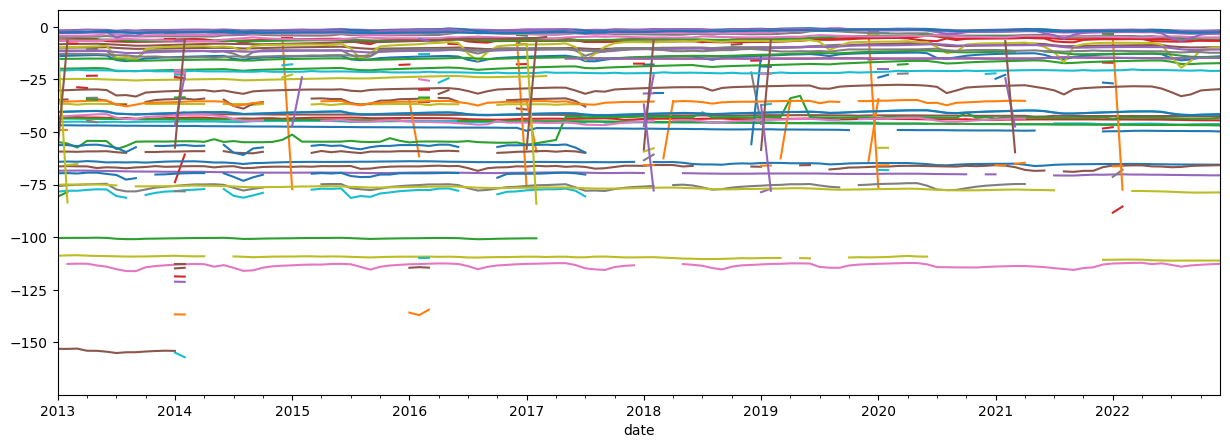

In [6]:
#First glance of the data
gdf_pivot_1.plot(figsize=(15,5), legend=False, xlim=[datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])
nb_sites_input = gdf_pivot_1.shape[1]
print("The number of observation points available is", nb_sites_input)

## 3. Data filtering
This step consists in removing observation wells from the analysis, for instance if they are incomplete. There are two options:
1. Removing time series if at least one value is missing
2. Removing time series if the percentage of missing values is larger than 70%

In [7]:
# DATA SELECTION
# This step consists in removing observation wells from the analysis, for instance if they are incomplete. 

# gdf_1 = gdf_pivot_1.copy().dropna(axis=1) saved formula to remove all time series if at least one value is missing

# Removing time series if the percentage of missing values is larger than some percentage
#perc_months_missing = 0.66
perc_months_missing =0.66
gdf_1 = gdf_pivot_1.copy()
    
max_number_of_monthly_nas = perc_months_missing*gdf_1.shape[0]
gdf_1 = gdf_1.loc[:, (gdf_1.isnull().sum(axis=0) <= max_number_of_monthly_nas)]

nb_sites = gdf_1.shape[1]
print("The number of observation points selected is", nb_sites) 

# Removing time series if data are missing for more than 1 year
gdf_1_year = gdf_1.resample('1y').mean()
gdf_1_year.index.name = "date"
print(gdf_1_year)

nb_years_missing = 1

col_to_drop = [i for i in gdf_1_year.columns if gdf_1_year[i].isnull().sum() > nb_years_missing]
print()
print(col_to_drop)
gdf_1.drop(col_to_drop, inplace = True, axis=1)

nb_sites = gdf_1.shape[1]
print("The number of observation points selected is", nb_sites) 

#gdf_1.plot(figsize=(15,5), legend=None, xlim=[datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])

The number of observation points selected is 60
site         #1004901   #1051909   #1053602   #1151403   #2330103   #2462601  \
date                                                                           
2013-12-31 -68.568750 -45.172619 -43.714286 -64.214286 -66.604444 -41.422857   
2014-12-31 -69.099653 -44.987500 -44.050992 -64.426786 -66.523810 -41.608333   
2015-12-31 -69.362897 -44.888889 -44.383730 -64.121825 -66.552579 -41.736111   
2016-12-31 -69.344127 -45.090833 -44.716468 -64.120278 -66.642659 -41.818333   
2017-12-31 -69.324722 -45.365801 -44.974206 -64.257341 -66.457778 -41.888194   
2018-12-31 -69.696032 -45.424167 -45.356944 -64.902208 -66.206979 -42.104325   
2019-12-31 -69.778770 -45.588135 -45.781964 -64.878373 -66.682292 -42.050000   
2020-12-31 -69.918615 -45.550000 -46.066667 -65.150556 -66.218135 -42.175000   
2021-12-31 -70.437988 -45.981905 -46.341228 -65.405789 -67.663732 -42.391667   
2022-12-31 -70.350256 -46.226858 -46.615242 -65.335408 -66.104187 -42.41

In [8]:
#Final dataset to work further in the evaluation
gdf_1

site,#1004901,#1051909,#1053602,#1151403,#2330103,#2462601,#2739903,#341010000000000,#354301,#373233000000000,...,#421210000000000,#422150000000000,#422849000000000,#423148000000000,#423730000000000,#4E+14,#526501,#655504,#712401,#954
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-68.383333,-45.283333,-43.450000,-64.133333,-66.366667,-41.200000,-42.866667,-43.500000,-46.783333,-22.3,...,-2.829032,-9.887097,-2.600000,-15.287097,-11.609091,-13.019355,NaN,-108.766667,-75.060000,NaN
2013-02-28,-68.350000,-45.116667,-43.500000,-64.016667,-66.183333,NaN,-42.828571,-43.500000,-46.800000,NaN,...,-2.760714,-9.696429,-2.550000,-15.200000,-11.600000,-12.850000,-112.666667,-108.616667,-74.916667,-13.700000
2013-03-31,-68.316667,-45.066667,-43.514286,-64.116667,-66.300000,NaN,-42.883333,-43.533333,-46.850000,NaN,...,-2.696774,-9.558065,-2.425806,-15.183871,-11.548387,-12.920902,-112.542857,-108.514286,-74.950000,NaN
2013-04-30,-68.333333,-45.150000,-43.583333,-63.816667,-66.316667,NaN,-43.116667,-43.600000,-46.883333,-22.1,...,-2.540000,-9.436667,-2.333333,-15.100000,-11.500000,-12.861111,-112.571429,-108.750000,-74.883333,NaN
2013-05-31,-68.416667,-45.350000,-43.657143,-64.016667,-67.100000,NaN,-43.100000,-43.666667,-46.883333,NaN,...,-2.364516,-9.280645,-2.329032,-15.100000,-11.500000,-12.939432,-113.383333,-108.866667,-74.900000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-70.406452,-46.516129,-46.603226,-65.425000,-66.587097,-42.403226,-44.235484,-46.641935,-49.503226,-22.3,...,-6.635484,-19.448387,-2.609677,-13.732258,-10.696774,-12.186290,-113.954839,-111.100000,-78.593548,-14.874194
2022-09-30,-70.490000,-46.340000,-46.700000,-65.456522,-66.120000,-42.416667,-44.343333,-46.700000,-49.543333,NaN,...,-5.360000,-16.166667,-2.700000,-14.216667,-11.038462,-11.950000,-113.383333,-111.076667,-78.740000,-14.800000
2022-10-31,-70.509677,-46.251613,-46.700000,-65.471429,-65.951613,-42.464516,-44.409677,-46.700000,-49.574194,NaN,...,-3.758065,-10.919355,-2.625806,-14.351613,-11.000000,-12.013710,-113.080645,-111.064516,-78.780645,-14.800000


## 4. Calculate aquifer-average trend
See https://www.w3schools.com/python/matplotlib_subplot.asp

In [9]:
# dataframe with site / date / level
gdf_melt = gdf_1.copy() #dataframe from step 3
gdf_melt = gdf_melt.unstack().reset_index(name='level')
gdf_melt.set_index('site', inplace=True)
gdf_melt

,date,level
site,,
#1004901,2013-01-31,-68.383333
#1004901,2013-02-28,-68.350000
#1004901,2013-03-31,-68.316667
#1004901,2013-04-30,-68.333333
#1004901,2013-05-31,-68.416667
...,...,...
#954,2022-08-31,-14.874194
#954,2022-09-30,-14.800000
#954,2022-10-31,-14.800000


In [10]:
#OBTAIN MEAN WATER LEVEL PER SITE TO THEN SUBTRACT FROM WATER LEVELS - ANOMALY 
waterlevel_means = gdf_melt.reset_index().groupby('site', as_index=False)['level'].mean()
waterlevel_means.set_index('site', inplace=True)
waterlevel_means

,level
site,
#1004901,-69.544010
#1051909,-45.389857
#1053602,-45.185486
#1151403,-64.679428
#2330103,-66.564489
#2462601,-41.994310
#2739903,-43.718873
#341010000000000,-45.222409
#354301,-48.284098


In [11]:
# ASSIGN MEAN WATER LEVEL TO EACH DATA ROW
gdf_melt['mean_level'] = gdf_melt.index.map(waterlevel_means['level'])*
gdf_melt

,date,level,mean_level
site,,,
#1004901,2013-01-31,-68.383333,-69.544010
#1004901,2013-02-28,-68.350000,-69.544010
#1004901,2013-03-31,-68.316667,-69.544010
#1004901,2013-04-30,-68.333333,-69.544010
#1004901,2013-05-31,-68.416667,-69.544010
...,...,...,...
#954,2022-08-31,-14.874194,-14.901199
#954,2022-09-30,-14.800000,-14.901199
#954,2022-10-31,-14.800000,-14.901199


In [12]:
# Calculate normalized water level "norm_level"
gdf_melt['norm_level'] = gdf_melt['level'] - gdf_melt['mean_level']
gdf_melt 

,date,level,mean_level,norm_level
site,,,,
#1004901,2013-01-31,-68.383333,-69.544010,1.160676
#1004901,2013-02-28,-68.350000,-69.544010,1.194010
#1004901,2013-03-31,-68.316667,-69.544010,1.227343
#1004901,2013-04-30,-68.333333,-69.544010,1.210676
#1004901,2013-05-31,-68.416667,-69.544010,1.127343
...,...,...,...,...
#954,2022-08-31,-14.874194,-14.901199,0.027006
#954,2022-09-30,-14.800000,-14.901199,0.101199
#954,2022-10-31,-14.800000,-14.901199,0.101199


          date  norm_level
0   2013-01-31   -0.250186
1   2013-02-28   -0.067267
2   2013-03-31   -0.113524
3   2013-04-30   -0.073470
4   2013-05-31    0.029760
..         ...         ...
115 2022-08-31   -0.853975
116 2022-09-30   -0.764092
117 2022-10-31   -0.347235
118 2022-11-30   -0.480470
119 2022-12-31   -0.329625

[120 rows x 2 columns]


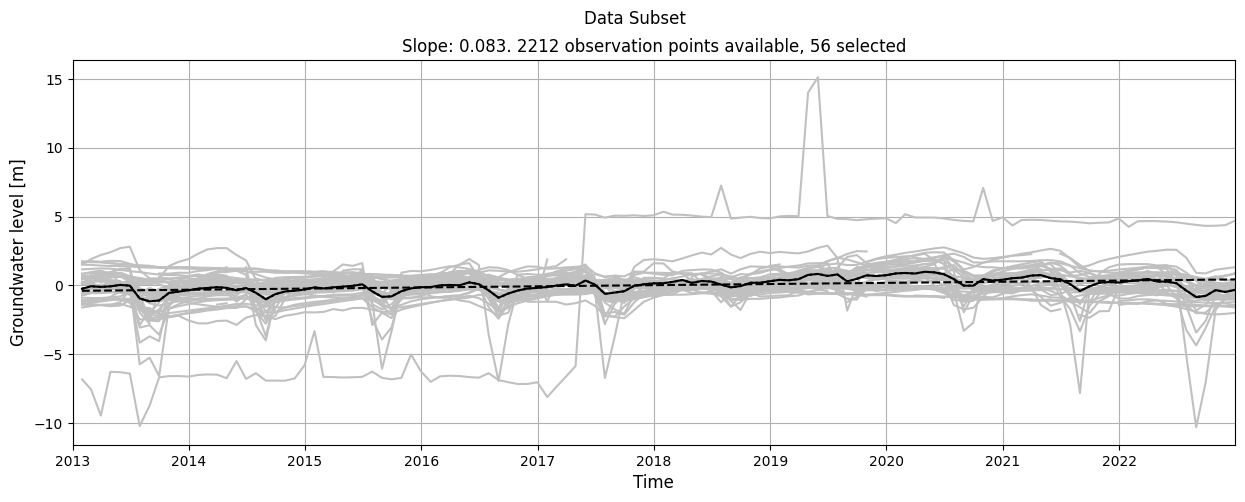

In [13]:
# aquifer-averaged data
final_df1 = gdf_melt[['date', 'norm_level']].groupby('date', as_index=False).mean()
print(final_df1)
final_df1.to_csv('debug.csv', index=False)

# linear trend
final_df1.loc[:, "date"] = pd.to_datetime(final_df1.loc[:, "date"], format="%d-%b-%y")
y_values = final_df1.loc[:, "norm_level"]
x_values = np.linspace(0, 1, len(final_df1.loc[:, "norm_level"]))
    
#cleaning NaN
idx = np.isfinite(x_values) & np.isfinite(y_values)
slope,b = np.polyfit(x_values[idx], y_values[idx], 1)
        
linear_fit = x_values*slope + b

fig, ax = plt.subplots(figsize=(15,5))

gdf_pivot = gdf_melt.pivot_table(index='date',columns='site',values='norm_level')    
plt.plot(gdf_pivot, color='#C0C0C0')     # all the monitoring curves

final_df2=final_df1.dropna()
plt.plot(final_df2.loc[:, "date"], final_df2.loc[:, "norm_level"],color='black', linestyle="dotted") # the composite hydrograph
plt.plot(final_df1.loc[:, "date"], final_df1.loc[:, "norm_level"],color='black') # the composite hydrograph

plt.plot(final_df1.loc[:, "date"], linear_fit, color='#000000', linestyle='dashed') # the linear regression

# axes
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Groundwater level [m]', fontsize = 12)
ax.grid()
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])

# title
plt.title("Slope: {}. {} observation points available, {} selected".format(round(slope/10, 3), nb_sites_input, nb_sites)) 
   # the slope is calculated over 0 --> 1, it has to be 2013.01.01 --> 2022.12.31 (10 years)
plt.suptitle(filename[:-4])

# save chart as an image
fig.savefig(filename[:-4] + ".jpg", bbox_inches='tight')

plt.show()

# UPDATE THE LIST OF OUTPUTS
list_aquifers.append((filename[:-4], round(slope, 3), nb_sites_input, nb_sites))

In [14]:
#final_df1.reset_index(inplace=True)
year_df = final_df1
print(year_df)
year_df.set_index('date', inplace=True)
year_df = year_df.resample('Y').mean()
year_df.dropna()
year_df['percent_rank'] = year_df.loc[:,'norm_level'].rank(pct=True)
print(year_df)
percentile = year_df.iloc[-1]['percent_rank']
percentile_year = year_df.index[-1]
print("percentile: {}\nyear: {}".format(percentile, percentile_year))

          date  norm_level
0   2013-01-31   -0.250186
1   2013-02-28   -0.067267
2   2013-03-31   -0.113524
3   2013-04-30   -0.073470
4   2013-05-31    0.029760
..         ...         ...
115 2022-08-31   -0.853975
116 2022-09-30   -0.764092
117 2022-10-31   -0.347235
118 2022-11-30   -0.480470
119 2022-12-31   -0.329625

[120 rows x 2 columns]
            norm_level  percent_rank
date                                
2013-12-31   -0.423125           0.1
2014-12-31   -0.386661           0.2
2015-12-31   -0.285508           0.3
2016-12-31   -0.204821           0.4
2017-12-31   -0.090772           0.6
2018-12-31    0.172969           0.7
2019-12-31    0.597058           1.0
2020-12-31    0.579734           0.9
2021-12-31    0.310038           0.8
2022-12-31   -0.111728           0.5
percentile: 0.5
year: 2022-12-31 00:00:00


## 6. Update summary file

We save the information about this aquifer in the summary file

In [15]:
# Create the pandas DataFrame
output_df = pd.DataFrame(list_aquifers, columns=['aquifer', 'slope', 'nb_sites_input', 'nb_sites'])
output_df.to_csv('Overview.csv', index=False)